# Getting Started in Machine Learning

### Chapter 20: Comparing Classification Methods - Heart Disease

This notebook contains examples from the book:

Getting Started in Machine Learning: Easy Recipes for Python 3, Scikit-Learn, Jupyter (2019) by Bella Romeo, Sherwood Forest Books, Los Angeles, CA, USA, ISBN-13: 978-0-9966860-6-8

(c) Copyright 2019.

<font style="font-size:xx-small; font-family:courier;">

    This notebook is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program. If not, see <https://www.gnu.org/licenses/>.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

 Description of Heart Disease Data File     
      
      
      -- 1. #3  (age)       
      -- 2. #4  (sex)       1=male, 0 female
      -- 3. #9  (cp)    type of chest pain
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
      -- 4. #10 (trestbps)  resting blood pressure
      -- 5. #12 (chol)      cholesteral
      -- 6. #16 (fbs)       fasting blood sugar
      -- 7. #19 (restecg)   restingecg
              0 = normal
     -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
      -- 8. #32 (thalach)   max elevated heart rate
      -- 9. #38 (exang)   exercised induced angina
      (1 = yes; 0 = no)
      -- 10. #40 (oldpeak)   ST Depression
      -- 11. #41 (slope)    the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping  
      -- 12. #44 (ca)       number of major vessels (0-3) colored by flourosopy 
      -- 13. #51 (thal)       3 = normal; 6 = fixed defect; 7 = reversable defect
      -- 14. #58 (num) num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing

In [12]:
DF=pd.read_csv(
"https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
    header=None,na_values="?")
DF=DF.dropna(axis=0)
DF.columns=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak",
           "slope","ca","thal","num"]
#
# Define age, cp, restecg, exang, slope as categorical data
#
categorical=["sex","cp","restecg","exang","slope"]
categorical=["sex","cp","fbs", "restecg","exang","slope", "thal"]
pd.set_option("display.width",100)
print(DF[:5])

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  slope   ca  thal  num
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3    3.0  0.0   6.0    0
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5    2.0  3.0   3.0    2
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6    2.0  2.0   7.0    1
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5    3.0  0.0   3.0    0
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4    1.0  0.0   3.0    0


#DF.columns="age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak",
         "slope","ca","thal","num"

### Designate Heart Disease Candiates those with non-zero value of num

In [13]:
num=np.array(DF["num"])
Y=np.array([1 if x>0.5 else 0 for x in num])
sum(Y), len(Y) # total number of those with heart disease, total number

(137, 297)

## Create Feature Matrix

### encode categorigal variables using 1-hot encoding

In [14]:
X=np.array(pd.get_dummies(DF.drop("num",1), columns=categorical))
print(X.shape)
X

(297, 25)


array([[ 63., 145., 233., ...,   0.,   1.,   0.],
       [ 67., 160., 286., ...,   1.,   0.,   0.],
       [ 67., 120., 229., ...,   0.,   0.,   1.],
       ...,
       [ 68., 144., 193., ...,   0.,   0.,   1.],
       [ 57., 130., 131., ...,   0.,   0.,   1.],
       [ 57., 130., 236., ...,   1.,   0.,   0.]])

# Compare Models

In [15]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

## return list of prediction errors for a classifier

nsplits = number of train/test splits

In [16]:
def evaluate(X, Y, MODEL, nsplits=100, PRINT=True):
    errs=[]
    for j in range(nsplits):
        XTRAIN,XTEST,YTRAIN,YTEST=train_test_split(X,Y)
        model=MODEL
        model.fit(XTRAIN,YTRAIN)
        YP=model.predict(XTEST)
        errs.append(1-accuracy_score(YTEST,YP))
    if PRINT:
        print("Mean error=%7.5f std=%7.5f" %(np.mean(errs), np.std(errs)))
    return errs

### Linear Regression

In [17]:
LRerrs=evaluate(X,Y,LR(),1000)

Mean error=0.16008 std=0.03831


### Naive Bayes

In [18]:
NBerrs=evaluate(X,Y,GaussianNB(),1000)

Mean error=0.18571 std=0.04131


### KNN

In [19]:
KNNerrs=evaluate(X,Y, KNN(), 1000)

Mean error=0.35299 std=0.04916


### LDA

In [20]:
LDAerrs=evaluate(X,Y,LDA(),1000)

/home/mathman/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Mean error=0.16281 std=0.03821


### QDA

In [21]:
QDAerrs=evaluate(X,Y,QDA(),1000)

/home/mathman/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Mean error=0.40207 std=0.08210


### SVM

In [22]:
SVMerrs=evaluate(X,Y,SVC(kernel="rbf"),1000)

Mean error=0.44457 std=0.05444


### 7-7-7 ANN

In [23]:
from sklearn.neural_network import MLPClassifier as ANN

In [24]:
ANNerrs=evaluate(X,Y,ANN(hidden_layer_sizes=(7,7,7),solver='lbfgs',random_state=1,
                alpha=1e-5),1000,PRINT=True);

Mean error=0.19299 std=0.06175


### Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier as RF

/home/mathman/.local/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [26]:
RFerrs=evaluate(X,Y,RF(),1000)

Mean error=0.20273 std=0.04235


### Full Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier as DT
DTerrs = evaluate(X,Y,DT(),1000)

Mean error=0.26828 std=0.04697


## Boxplot comparing different classifiers

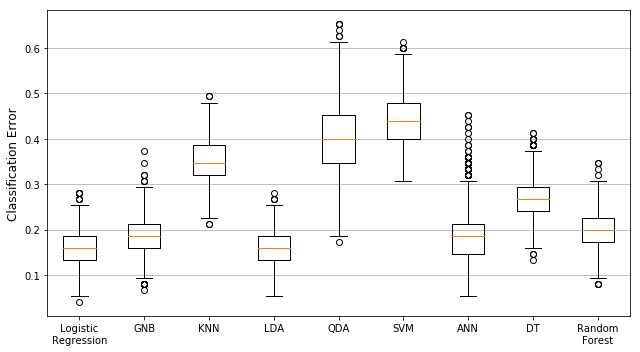

In [28]:
plt.boxplot([LRerrs,NBerrs,KNNerrs, LDAerrs,QDAerrs, SVMerrs, ANNerrs, DTerrs,
            RFerrs])
plt.xticks(range(1,10),["Logistic\nRegression", "GNB", "KNN", "LDA", "QDA", "SVM", 
                       "ANN", "DT", "Random\nForest"]);
plt.ylabel("Classification Error", fontsize=12)
#plt.title("Heart Disease Clasification")
plt.gcf().set_size_inches(9,5)
plt.gcf().tight_layout()
plt.grid(axis="y")
plt.gcf().savefig("heart-disease-boxplots.pdf")

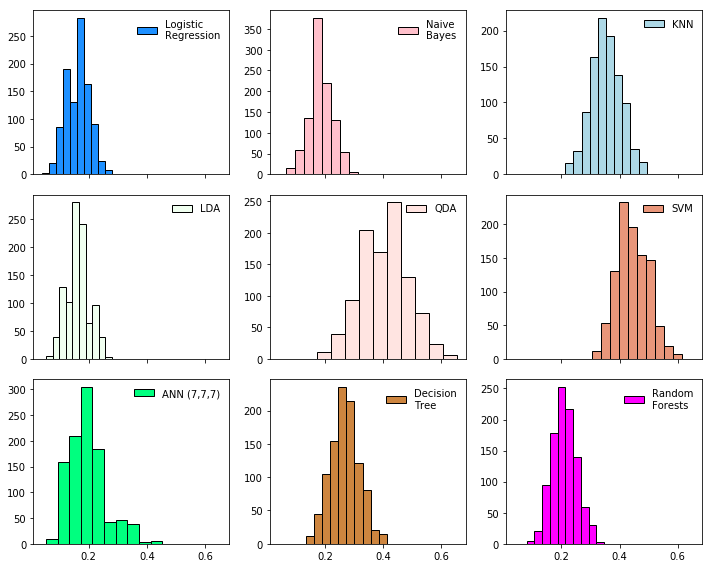

In [29]:
fig,ax=plt.subplots(nrows=3,ncols=3,sharex=True)
h=ax[0][0].hist(LRerrs,color="dodgerblue",edgecolor="k",label="Logistic\nRegression")
ax[0][1].hist(NBerrs,color="pink",edgecolor="k",label="Naive\nBayes")
ax[0][2].hist(KNNerrs,color="lightblue",edgecolor="k",label="KNN")
ax[1][0].hist(LDAerrs,color="honeydew",edgecolor="k",label="LDA")
ax[1][1].hist(QDAerrs,color="mistyrose",edgecolor="k",label="QDA")
ax[1][2].hist(SVMerrs,color="darksalmon",edgecolor="k",label="SVM")
ax[2][0].hist(ANNerrs,color="SpringGreen",edgecolor="k",label="ANN (7,7,7)")
ax[2][1].hist(DTerrs,color="Peru",edgecolor="k",label="Decision\nTree")
ax[2][2].hist(RFerrs,color="fuchsia",edgecolor="k",label="Random\nForests")

for j in range(3): 
    for k in range(3): ax[j][k].legend(frameon=False)
fig.set_size_inches(10,8)
fig.tight_layout()
#fig.suptitle("Error Frequency Histograms (Heart Disease Data)",fontsize=16);
fig.savefig("heart-disease-histograms.pdf")

## Generate ROC Curves for Heart Disease Classification Data

In [30]:
def ROC(X, Y, MODEL):
    XTRAIN,XTEST,YTRAIN,YTEST=train_test_split(X,Y)
    model=MODEL
    model.fit(XTRAIN,YTRAIN)
    YPR=model.predict_proba(XTEST)[:,1]
    F,T,THRESH=roc_curve(YTEST,YPR)
    return(F,T)

### ROC Data for Linear Regression

In [31]:
LRF,LRT=ROC(X,Y,LR())

### ROC data for Naive Bayes

In [32]:
NBF,NBT=ROC(X,Y,GaussianNB())

### ROC Data for KNN

In [33]:
KNNF,KNNT=ROC(X,Y,KNN())

### ROC Data for LDA

In [34]:
LDAF,LDAT=ROC(X,Y,LDA())

/home/mathman/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


### ROC Data for QDA

In [35]:
QDAF,QDAT=ROC(X,Y,QDA())

/home/mathman/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


### ROC Data for SVM

In [36]:
SVMF,SVMT=ROC(X,Y,SVC(probability=True))

### ROC Data for ANN

In [37]:
AF, AT = ROC(X,Y, ANN(hidden_layer_sizes=(7,7,7),solver='lbfgs',random_state=1,
                alpha=1e-5))

### ROC Data for RF

In [38]:
RFF, RFT = ROC(X,Y, RF())

### ROC Data for Decision Tree

In [39]:
DTF, DTT = ROC(X,Y, DT())

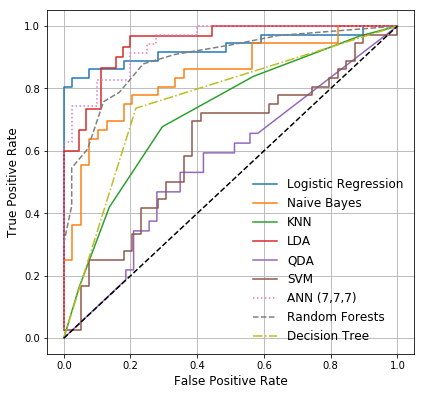

In [40]:
plt.plot(LRF,LRT,label="Logistic Regression")
plt.plot(NBF,NBT,label="Naive Bayes")
plt.plot(KNNF,KNNT,label="KNN")
plt.plot(LDAF,LDAT,label="LDA")
plt.plot(QDAF,QDAT,label="QDA")
plt.plot(SVMF,SVMT,label="SVM")
plt.plot(AF, AT, label="ANN (7,7,7)", ls=":")
plt.plot(RFF, RFT, label="Random Forests", ls="--")
plt.plot(DTF, DTT, label="Decision Tree", ls="-.")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate",fontsize=12)
#plt.title("Comparison of Methods\nFor Heart Disease Data",fontsize=15)
plt.plot([0,1],[0,1],c="k",ls="--")
plt.legend(fontsize=12,frameon=False)
plt.grid()
plt.gcf().tight_layout()
plt.gcf().set_size_inches(6,6)
plt.gcf().savefig("Heart-Disease-roc.pdf")